Findings:
- Data already normalized -> doesnt change distribution
- Standard scaling -> doesnt change distribution??

In [1]:
import numpy as np
# Path to your CSV file
path_train = 'data/train_data.npy'
path_test = 'data/test_data.npy'
path_test_label = 'data/test_labels.npy'

# Read the CSV file into a DataFrame
train = np.load(path_train)
test = np.load(path_test)
test_labels = np.load(path_test_label)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def plot_distribution(df):
    # Number of columns
    num_columns = len(df.columns)
    
    # Calculate the number of rows and columns for the subplots
    num_rows = math.ceil(num_columns / 3)
    num_cols = min(num_columns, 3)
    
    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
    
    # Flatten the axes array if there's more than one plot
    axes = axes.flatten() if num_columns > 1 else [axes]
    
    # Plot data distribution for each column
    for i, column in enumerate(df.columns):
        axes[i].hist(df[column], bins=10, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
    
    # Remove any unused axes
    for ax in axes[num_columns:]:
        ax.remove()
    
    plt.tight_layout()
    plt.show()

In [3]:
train

array([[0.00000000e+00, 5.29434115e-03, 5.00000000e-01, ...,
        1.21664406e-03, 1.46783661e-04, 0.00000000e+00],
       [0.00000000e+00, 5.40697755e-03, 5.00000000e-01, ...,
        1.21664406e-03, 1.46783661e-04, 0.00000000e+00],
       [0.00000000e+00, 5.51961394e-03, 5.00000000e-01, ...,
        1.21664406e-03, 1.46783661e-04, 0.00000000e+00],
       ...,
       [8.86944408e-01, 5.77189508e-01, 1.00000000e+00, ...,
        9.43629157e-01, 7.33918016e-05, 0.00000000e+00],
       [8.84610789e-01, 5.77245755e-01, 1.00000000e+00, ...,
        9.43629157e-01, 7.33918016e-05, 0.00000000e+00],
       [8.84144138e-01, 5.77133118e-01, 1.00000000e+00, ...,
        9.44115667e-01, 7.33918016e-05, 0.00000000e+00]])

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(train)

# -> data is already normalized

In [5]:
normalized_data

array([[0.00000000e+00, 5.29434115e-03, 5.00000000e-01, ...,
        1.21664406e-03, 1.46783661e-04, 0.00000000e+00],
       [0.00000000e+00, 5.40697755e-03, 5.00000000e-01, ...,
        1.21664406e-03, 1.46783661e-04, 0.00000000e+00],
       [0.00000000e+00, 5.51961394e-03, 5.00000000e-01, ...,
        1.21664406e-03, 1.46783661e-04, 0.00000000e+00],
       ...,
       [8.86944408e-01, 5.77189508e-01, 1.00000000e+00, ...,
        9.43629157e-01, 7.33918016e-05, 0.00000000e+00],
       [8.84610789e-01, 5.77245755e-01, 1.00000000e+00, ...,
        9.43629157e-01, 7.33918016e-05, 0.00000000e+00],
       [8.84144138e-01, 5.77133118e-01, 1.00000000e+00, ...,
        9.44115667e-01, 7.33918016e-05, 0.00000000e+00]])

In [7]:
import pandas as pd
df_normalized = pd.DataFrame(normalized_data)

In [17]:
df_normalized[7].value_counts()

7
0.074736    2259
0.072828    1948
0.069513    1928
0.069111    1901
0.071020    1878
            ... 
0.842592       1
0.857961       1
0.866198       1
0.870919       1
0.906780       1
Name: count, Length: 5520, dtype: int64

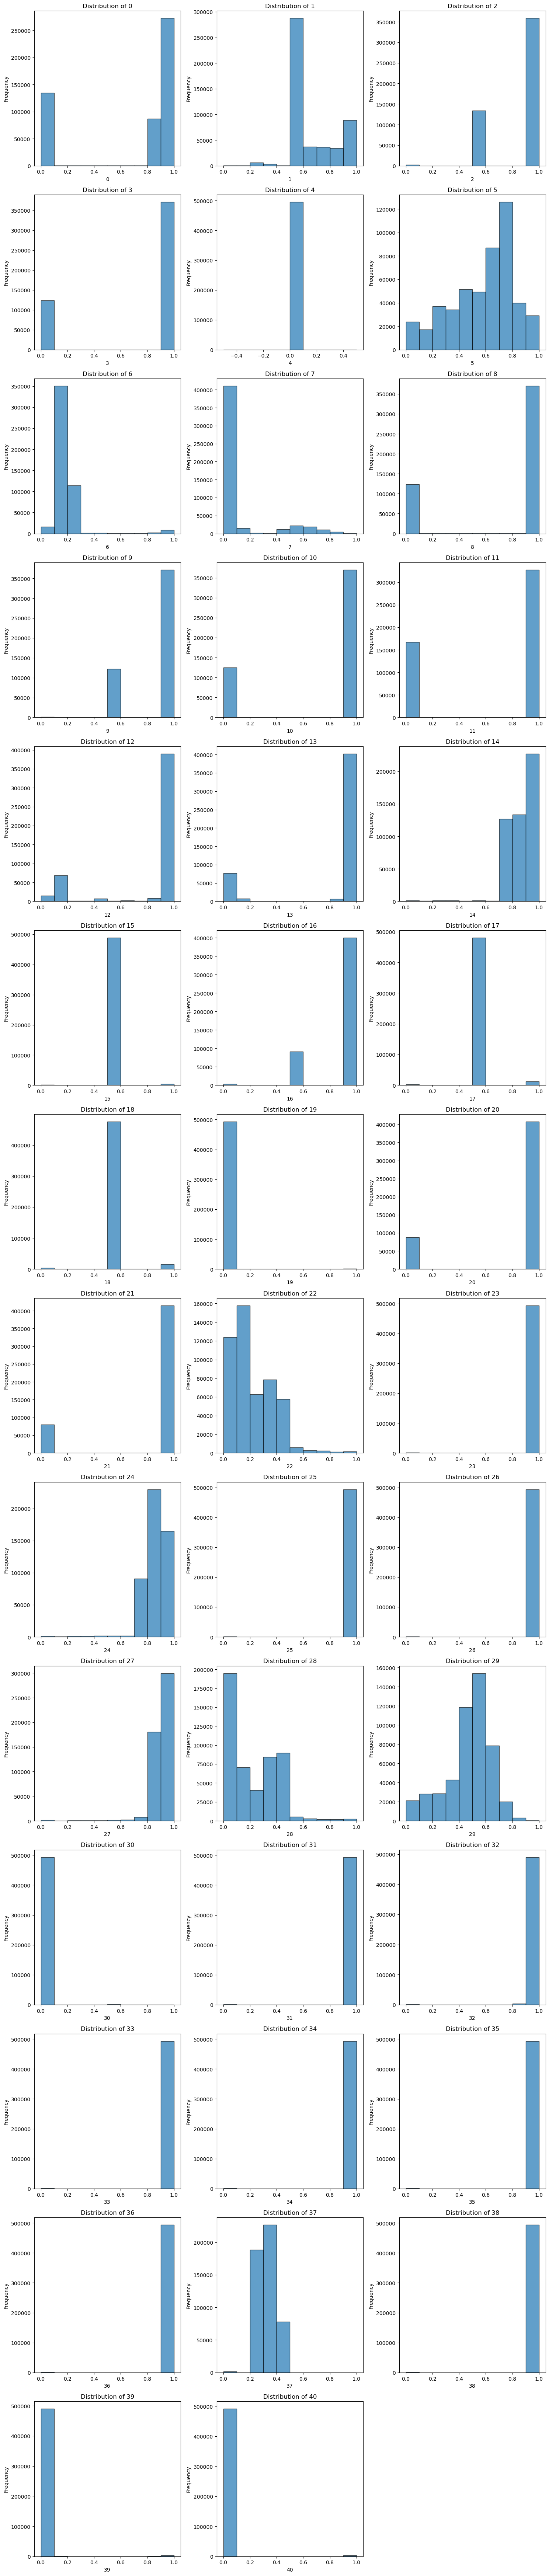

In [10]:
plot_distribution(df_normalized)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(train)

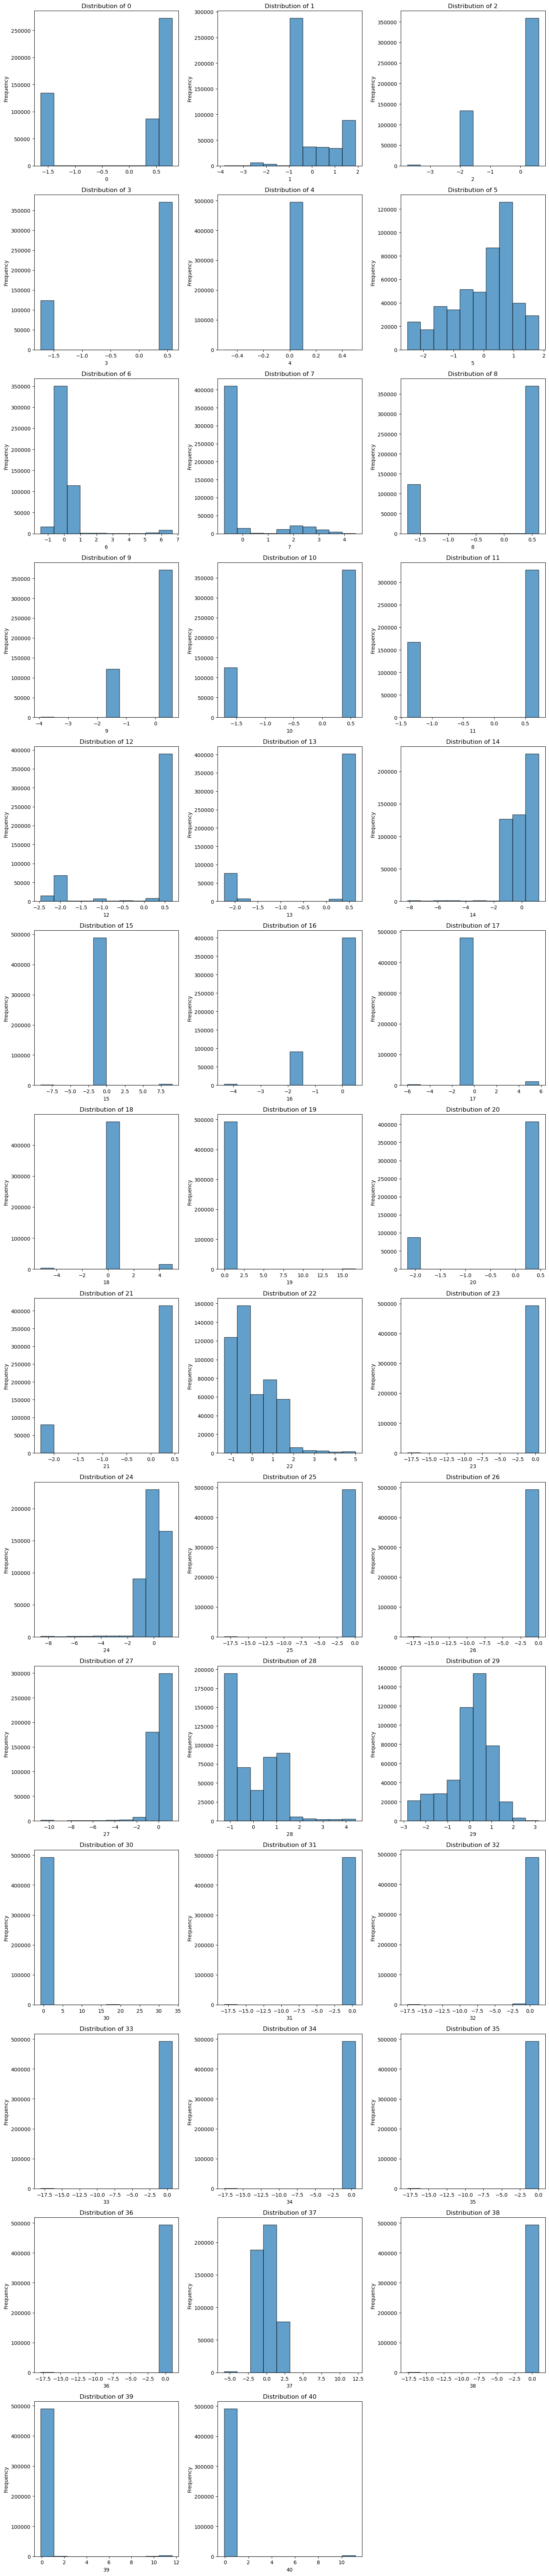

In [12]:
plot_distribution(pd.DataFrame(standardized_data))